# 10 - Computer lab 1

**To use the code, click the rocket icon at the top of the page, and then click Colab**. This will take you to a live version of this page where you can run the code. 

In this lab you will see how we can use scientific computing approaches to gain further insight into problems in mathematical biology. This lab will focus on epidemic models.

# Getting started #

For those of you who have never coded in python before, it might be useful to see a few useful features (hopefully you have watched the video on Blackboard as well).

Firstly, we can get python to output (or print) things to the screen. If we want it to say a specific phrase we put that in speech marks. If we want it to print out the value of some parameter or variable, we just write the name of the variable. Try typing the following few lines into the cell below this one (you won't be able to just copy and paste these - you need to type them out!).

    print("Hello World")
    x=17
    print(x)
    y=[1,1,2,3,5,8,13,21,34,55,89]
    print("The 10th number in the Fibonacci sequence is", y[9])

(Notice that to get the 10th number in the list called y, we refer to y[9]. That is because python starts counting from 0.)

Then either click the icon that looks like a Play button, or hit Shift-Enter. You should then see the phrase printed out just below.

In [ ]:
# YOUR CODE GOES HERE


Well done - you've done your first coding!!

Let's try something a bit more advanced. A real advantage of coding in science and maths is using *loops*. This means we can do a large set of calculations with just a few lines of code. Let's do this to calculate the first 10 square numbers. Type the following into the next code box:

    for i in range(11):
        print("The square of", i, "is", i**2)

(You will notice when you hit return after the colon the line automatically indents. This is important - you must leave the indent there for Python to understand the code). You can hopefully appreciate that this means we can carry out lots of calculations using programming in a quick and efficient way.

If you feel like a general coding challenge, see if you can write code to produce the first N numbers in the Fibonacci sequence, like you did above, but now using a loop rather than having to write them all out yourself.

In [ ]:
# YOUR CODE GOES HERE

# 1 - A first epidemic model#

First we shall write code for our first epidemic model given by the following ODEs,

\begin{eqnarray*}
\frac{dS}{dt} &= -\beta SI\\
\frac{dI}{dt} &= \beta SI - \gamma I\\
\frac{dR}{dt} &= \gamma I.
\end{eqnarray*}

The parameter $\beta$ controls how infectious the virus is, and $\gamma$ controls how quickly infected individuals clear the virus. Remember that since the population size is constant we do not need to actively follow $dR/dt$ (though we can if we really want to).

The video on Blackboard showed you how to build up a very similar model. Here I have provided working code for you. Again, you can run it either by clicking in the cell and hitting Shift-Enter or by clicking on the 'Play' icon.


([<matplotlib.axis.XTick at 0x7fcc1051c610>,
 <a list of 3 Text major ticklabel objects>)

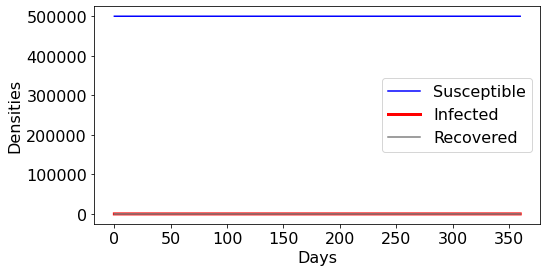

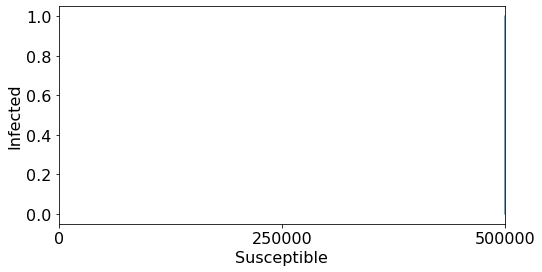

In [ ]:
#These are the modules we need to run some of our commands
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These make the plots look nicer
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 16})

# This function contains our ODEs
def disease(t,x):
    sdot=-BETA*x[0]*x[1]
    idot=BETA*x[0]*x[1]-GAMMA*x[1]
    return sdot, idot

# We need to choose values for all of our model parameters
N0=500000         # Total population size
GAMMA=1/14        # Recovery rate (1/14 means it takes 14 days for hosts to recover)
R0=2.5              # I will decide on an R0, then use that to calculate what the transmission must be
BETA=R0*GAMMA/N0  # Transmission

# Now we specify time-points to run the model for and initial conditions for S0 and I0
ts=np.linspace(0,360,3601)
x0=[N0-1,1]

# The magic happens when we send it all to the solve_ivp function
xsol=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts)

# And now we plot the output
plt.figure()
plt.plot(ts,xsol.y[0],'b',label='Susceptible')
plt.plot(ts,(xsol.y[1]),'r',label='Infected',linewidth=3)
plt.plot(ts,N0-(xsol.y[0]+xsol.y[1]),'gray',label='Recovered')
plt.xlabel('Days')
plt.ylabel('Densities')
plt.legend()
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure1.png')

plt.figure()
plt.plot(xsol.y[0],xsol.y[1])
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.xticks([0,250000,500000]) # This line is there to stop the x axis getting too messy
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure2.png')

Examine the two plots. The first gives you a time course of the 3 densities, and the second shows  atrajectory in the phase space. Do they look how you'd expect? Try changing some parameter values, to a lower or high $R_0$ for example. How do the plots change?

As well as these plots we can get pythong to tell us useful information. For example, we might ask what is the density of susceptible people at the end of the time-course? And what was the density of infected people at the peak? The next cell will get python will tell you these things.


In [ ]:
print("After", ts[-1], "days there are", round(xsol.y[0,-1],2), "susceptible individuals,", round(xsol.y[1,-1],2), "infected individuals and", round(N0-xsol.y[0,-1]-xsol.y[1,-1],2), "recovered individuals")
print("At the infection's peak there were", round(np.max(xsol.y[1]),2),"infected individuals.")

After 360.0 days there are 99969.44 susceptible individuals, 104.51 infected individuals and 399926.05 recovered individuals
At the infection's peak there were 76613.55 infected individuals.


# 2 - How to best control an epidemic #

Let's extend our model to ask a different question. This code has been set up so you just move a slider - you won't do any of the coding.

A big question for communities and governments in the last few years has been how best to control the spread of infection through *non-pharmaceutical interventions* (NPIs) such as lockdowns, group size limits, mask-wearing, etc. In the next bit of code you'll be able to decide:
* The start day of the control
* The length of the control
* The effect of the control (through a percentage reduction in $R_0$).

Click the play button again, then use the sliders to choose your values. You'll see the plot update as you choose diferent values.

Let's say you know a particular NPI can reduce $R_0$ by 50% (so set 'Effect' to 50) but that you don't want to implement it for more than 2 months (so set 'Length' to 60). What start day would you recommend for the control and why? Keeping the Effect at 50, can you find a combination of Start Day and Length that will keep the number of infections below 25,000 for the length of the simulation?



In [ ]:
#@title
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

#controlstartw=widgets.FloatSlider(min=5, max=100, step=5, value=50, description='Control start day')
#controllengthw=widgets.FloatSlider(min=0, max=150, step=10, value=100, description='Control length')
#controleffectw=widgets.FloatSlider(min=0, max=100, step=5, value=50, description='Control effect')

def disease(t,x,BETA,GAMMA):
    sdot=-BETA*x[0]*x[1]
    idot=BETA*x[0]*x[1]-GAMMA*x[1]
    return sdot, idot

def basic_covid(controlstartw,controllengthw,controleffectw):
  start_cont=int(controlstartw)
  end_cont=int(start_cont+controllengthw)

  N0=500000        # Population size
  gamma=0.1         # Recovery rate
  R0=2.5
  beta1=R0*gamma/N0  # Transmission
  ts=np.linspace(0,365,1000)
  x0=[N0-1,1]  #Initial condition assuming population of 65 million with 1 infected

  ta=np.linspace(0, start_cont, start_cont*10)
  tb=np.linspace(start_cont,end_cont,600)
  if end_cont<365:
    tc=np.linspace(end_cont,365,(365-end_cont)*10)
  else:
    tc=np.linspace(end_cont,end_cont+0.001,1)
  xxa=solve_ivp(disease,[ta[0],ta[-1]],x0,t_eval=ta,args=(beta1,gamma,))
  xxb=solve_ivp(disease,[tb[0],tb[-1]],[xxa.y[0,-1],xxa.y[1,-1]],t_eval=tb,args=((100-controleffectw)/100*beta1,gamma,))
  xxc=solve_ivp(disease,[tc[0],tc[-1]],[xxb.y[0,-1],xxb.y[1,-1]],t_eval=tc,args=(beta1,gamma,))

  plt.rcParams['figure.figsize'] = [8, 4]#
  plt.rcParams.update({'font.size': 16})

  fig1=plt.figure()
  xx1=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts,args=(beta1,gamma,))
  plt.plot(ts,xx1.y[1],'r',label='No control')
  plt.plot(ta,(xxa.y[1]),'b',label='Control')
  plt.plot(tb,(xxb.y[1]),'b')
  plt.plot(tc,(xxc.y[1]),'b')
  plt.xlabel('Days')
  plt.ylabel('No. Infected individuals')
  plt.ylim([0,150000])
  plt.legend()

interact(basic_covid,controlstartw=widgets.IntSlider(min=5, max=100, step=5, value=50, description='Start day'),controllengthw=widgets.IntSlider(min=5, max=150, step=5, value=50, description='Length'),controleffectw=widgets.IntSlider(min=0, max=100, step=5, value=50, description='Effect'))


interactive(children=(IntSlider(value=50, description='Start day', min=5, step=5), IntSlider(value=50, descrip…

<function __main__.basic_covid(controlstartw, controllengthw, controleffectw)>

# 3 - Control with different risk groups

The model above assumed that everyone in the population was subject to the same control measures. What if we were instead to target control measures only to thos emost vulnerable to the infection? In the next model we test out this idea (which was suggested by some as a possible strategy during the worst stages of Covid-19). We define 20% of the population to be high-risk and the rest as low-risk. We then test out 4 different strategies:

1. No control at all.
2. Full control of both groups.
3. Control only of the high-risk group.
4. Control only of the low-risk group.

Here control again means reducing $R_0$ by some percentage, with a default of $R_0=3$. We plot two things here - the total number of infections in the population and the number of infections in the high-risk group.

Choose a level of control and see what happens.

In [ ]:
#@title
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def disease_risk(t,x,betall,betahh,betahl,gamma):
    sldot=-betall*x[0]*x[1]-betahl*x[0]*x[3]
    ildot=betall*x[0]*x[1]+betahl*x[0]*x[3]-gamma*x[1]
    shdot=-betahh*x[2]*x[3]-betahl*x[2]*x[1]
    ihdot=betahh*x[2]*x[3]+betahl*x[2]*x[1]-gamma*x[3]
    return sldot, ildot, shdot, ihdot

def riskmodel(controlw):
  N0=65000000        # Population size
  gamma=1/14         # Recovery rate
  R0=3
  scale=10**6 # Use to make plots easier to understand
  beta1=R0*gamma/N0  # Transmission
  ts=np.linspace(0,365,8000)
  x0=[N0*0.8-1,1,N0*0.2,0]  #Initial condition
  control=(100-controlw)/100

  xx1=solve_ivp(disease_risk,[ts[0],ts[-1]],x0,t_eval=ts,args=(beta1,beta1,beta1,gamma,))
  xx2=solve_ivp(disease_risk,[ts[0],ts[-1]],x0,t_eval=ts,args=(control*beta1,beta1,control*beta1,gamma,))
  xx3=solve_ivp(disease_risk,[ts[0],ts[-1]],x0,t_eval=ts,args=(beta1,control*beta1,control*beta1,gamma,))
  xx4=solve_ivp(disease_risk,[ts[0],ts[-1]],x0,t_eval=ts,args=(control*beta1,control*beta1,control*beta1,gamma,))

  fig1=plt.figure()
  plt.plot(ts,(xx1.y[1]+xx1.y[3])/scale,'r',label='No control')
  plt.plot(ts,(xx3.y[1]+xx3.y[3])/scale,'y',label='Control in high-risk')
  plt.plot(ts,(xx2.y[1]+xx2.y[3])/scale,'b',label='Control in low-risk')
  plt.plot(ts,(xx4.y[1]+xx4.y[3])/scale,'k',label='Control in all')

  plt.xlabel('Days')
  plt.ylabel('No. Infected individuals (millions)')
  plt.legend();

  fig2=plt.figure()
  plt.plot(ts,(xx1.y[3]/scale),'r',label='No control')
  plt.plot(ts,(xx3.y[3]/scale),'y',label='Control in high-risk')
  plt.plot(ts,(xx2.y[3]/scale),'b',label='Control in low-risk')
  plt.plot(ts,(xx4.y[3]/scale),'k',label='Control in all')

  plt.xlabel('Days')
  plt.ylabel('No. high-risk Infected individuals (millions)')
  plt.legend();
  return()

interact(riskmodel,controlw=widgets.IntSlider(min=0, max=100, step=5, value=10, description='Effect'))


interactive(children=(IntSlider(value=10, description='Effect', step=5), Output()), _dom_classes=('widget-inte…

<function __main__.riskmodel(controlw)>

Perhaps you are surprised to see that while controlling only the high-risk group reduces both total and high-risk infections compared to no control, this strategy is actually much less effective than if we were to only control the low-risk group. This is just down to the weight of numbers. When there are so many low-risk individuals, even if there is a small amount of contact between low- and high-risk gorups, there can be significant amounts of infection. Therefore if we actually control the larger low-risk group, we can reduce the amount of infection, not just in the whole population but actually amongst the high-risk group specifically.

# 3: Including randomness in our model#

The models we have looked at so far are examples of *deterministic* models. The key aspect of these is that if we use the same values for all our parameters and the same starting conditions, we will get the exact same results every time. They are therefore entirely predictable, hence the name "deterministic" (you may or may not be surprised to know that even chaotic systems are in fact deterministic). An alternative approach is a *stochastic* model. In this case we include randomness in our model, which leads to a different outcome every time we run our model.

The model below is the same as the very first model you ran, except the population size is reduced to 1000 to keep it running quickly. This time you need to click the button after you select your value of $R_0$ to make the simulation run. As well as the deterministic model, it will now also produce 20 stochastic simuation runs. You will also see a red dot marking where the stochastic simulation says the infection dies out. You should see that you get a bit of variation between the 20 runs - for example in the height and timing of the peak and the point when the infection dies out - but that the deterministic model does ok as an average.

Do you get larger variation for a larger or smaller value of $R_0$? Try setting $R_0$ to be 1.5 or 2 and run the simulations. Do you notice anything unusual?

In [ ]:
#@title
# Import the necessary libraries
from ipywidgets import interact_manual
R0w=widgets.FloatSlider(min=0, max=5, step=0.5, value=2.5, description='R_0')

def run_model1():
  N=1000
  GAMMA=1/10
  R0=R0w.value
  BETA=R0*GAMMA/N
  REPS=20
  I0=5


  # INDIVIDUAL-BASED MODEL

  # Function to count noumbers in each compartment
  def count_type(type):
      current_type=0;
      for i in range(0,N):
          for j in range(0,N):
              if grid[i,j]==type:
                  current_type=current_type+1
      return current_type

  # Function to check the current scale
  def findscale():
      S=susceptibles[-1]
      I=infecteds[-1]
      #Set relative parameter values
      scale=GAMMA*I+BETA*S*I
      return scale

  for reps in range(0,REPS):
      # Set initial conditions
      #grid=np.zeros((N,N))
      tsteps=[0]
      infecteds=[I0]
      susceptibles=[N-I0]
      current_t=0

      plt.rcParams['figure.figsize'] = [8, 4]#
      plt.rcParams.update({'font.size': 16})

      # Main run
      while current_t<180:
          # Find tau-leap
          scale=findscale()
          dt = -np.log(np.random.rand()) / scale
          current_t=tsteps[-1]
          tsteps.append(dt+current_t)

          #Find event
          if np.random.rand()<GAMMA*infecteds[-1]/scale: #Event is recovery
              infecteds.append(infecteds[-1]-1)
              susceptibles.append(susceptibles[-1])
          else: #Event is transmission
              infecteds.append(infecteds[-1]+1)
              susceptibles.append(susceptibles[-1]-1)

          if infecteds[-1]==0:
              plt.scatter(tsteps[-1],infecteds[-1]+5,s=100,c='r')
              break

      # Plot latest run
      if reps==0:
          plt.plot(tsteps,infecteds,':',color='lightgray',label='Stochastic model')
      else:
          plt.plot(tsteps,infecteds,':',color='lightgray')

  ts=np.linspace(0,150,2000)
  xx1=solve_ivp(disease,[ts[0],ts[-1]],[995,5],t_eval=ts,args=(BETA,GAMMA,))
  plt.plot(ts,(xx1.y[1]),'k',label='Deterministic model')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel ('No. Infected')
  plt.xlim(0,180)
  plt.ylim(-5,600)
  return()

display(R0w)
my_interact_manual3 = interact_manual.options(manual_name="Run model")
my_interact_manual3(run_model1)

FloatSlider(value=2.5, description='R_0', max=5.0, step=0.5)

interactive(children=(Button(description='Run model', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

<function __main__.run_model1()>

**Uncertainty**

One of the most important aspects of disease modelling, and in particular how we communicate our findings to the general public, is uncertainty. While we have produced these nice smooth, deterministic graphs, we know that in reality things will be more messy due to the complexisties of the real world and the effects of randomness. These stochastic models highlight how we might get different outcomes and that there is some balance of probabalities to think about. For example, for a smallish $R_0$ we *might* get lucky and have an infection that dies out naturally but it is more likely the disease will spread.

#4 - Bells and whistles#

In this model we'll look at something rather more complex. Let's think about how an epidemic might spread within a small, closed population, for example on a university campus, and how different management strategies might affect an epidemic.  Underlying the whole thing is an SIR model of the types we've been looking at, but with the following additions:


*   1000 people live in 100 households of 10.
* Everyone is also assigned to a daily class lasting 2 hours. The default class size is 100.
* Every week a proportion of the population test to see if they have the disease. The test is 95% accurate for positive cases and 99% accurate for negative cases. The default proportion of the population testing is 20%.
* Anyone who tests positive isolates fully for a fixed number of days. The default isolation period is 3 days.
* Contacts of anyone who has tested positive (taken randomly from their household and class) can also be told to isolate for the same isolation period. The default is that nobody is traced.

Using the sliders you can decide what interventions you want to introduce to slow the spread. The simulation will show what happens in the default case and then what happens under your proposed controls.

*This code is a fair bit slower than the previous examples so have patience!*

What seems to be the best single intervention? What combination of measures might you suggest to a management committee wanting to limit the epidemic as far as possible without causing substantial disruption to the community?

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import interact_manual

style = {'description_width': 'initial'}
test_w=widgets.IntSlider(min=0, max=100, step=5, value=20, description='% Testing',style=style)
isolate_w=widgets.IntSlider(min=1, max=10, step=1, value=3, description='Days isolating',style=style)
trace_w=widgets.IntSlider(min=0, max=10, step=1, value=0, description='Max no. contacts',style=style)
class_w=widgets.IntSlider(min=10, max=100, step=10, value=100, description='Class size',style=style)
mix_w=widgets.IntSlider(min=0, max=100, step=10, value=0, description='% Mixing reduction',style=style)

### Global constants
def runmodel():

    POPSIZE=1000 # Total individuals in population
    NOHOUSES=100 # No. of households (mean household size = POPSIZE / NOHOUSES)

    OMEGA=1/7 # Latent rate
    GAMMA=1/7 # Recovery rate
    WANE=0 # Waning immunity rate
    ISOLATE=5
    BETA=np.zeros(2)
    BETA[0]=0.02 # Transmission coefficient at home
    BETA[1]=0.02 # Transmission coefficient at class
    #BETASS=0.02

    REPS=10 # No. of replicate runs
    I0=10 # Initial no. of infected individuals (mean)
    MAX_TIME=150 # Max time
    CLASS_START = 0.4 # Time in day when move to class
    CLASS_END = 0.48333 # Time in day when move to house

    statstore=np.zeros(4)

    plt.rcParams.update({'font.size': 16})

    solstore=np.zeros((10,150))
    solstore[0]=[0.0, 11.0, 11.0, 10.0, 9.0, 10.0, 8.0, 9.0, 13.0, 17.0, 16.0, 17.0, 23.0, 28.0, 29.0, 27.0, 31.0, 34.0, 36.0, 39.0, 39.0, 49.0, 42.0, 42.0, 47.0, 51.0, 59.0, 61.0, 69.0, 70.0, 73.0, 75.0, 87.0, 93.0, 110.0, 125.0, 133.0, 141.0, 151.0, 157.0, 166.0, 170.0, 187.0, 201.0, 194.0, 197.0, 205.0, 204.0, 194.0, 199.0, 193.0, 181.0, 175.0, 170.0, 176.0, 162.0, 151.0, 146.0, 139.0, 131.0, 123.0, 108.0, 99.0, 92.0, 85.0, 81.0, 78.0, 74.0, 74.0, 68.0, 50.0, 48.0, 42.0, 41.0, 37.0, 38.0, 34.0, 29.0, 32.0, 31.0, 28.0, 25.0, 23.0, 21.0, 20.0, 20.0, 18.0, 15.0, 12.0, 11.0, 9.0, 10.0, 9.0, 7.0, 7.0, 7.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[1]=[0.0, 11.0, 12.0, 15.0, 13.0, 12.0, 15.0, 14.0, 15.0, 15.0, 18.0, 17.0, 24.0, 24.0, 28.0, 31.0, 33.0, 39.0, 40.0, 39.0, 42.0, 43.0, 50.0, 56.0, 59.0, 71.0, 88.0, 94.0, 100.0, 110.0, 113.0, 125.0, 122.0, 133.0, 143.0, 152.0, 151.0, 154.0, 157.0, 157.0, 151.0, 161.0, 150.0, 159.0, 162.0, 158.0, 160.0, 160.0, 147.0, 140.0, 139.0, 135.0, 131.0, 125.0, 119.0, 115.0, 110.0, 107.0, 102.0, 93.0, 88.0, 84.0, 74.0, 76.0, 74.0, 68.0, 63.0, 59.0, 50.0, 50.0, 45.0, 42.0, 36.0, 37.0, 37.0, 35.0, 34.0, 33.0, 27.0, 24.0, 24.0, 18.0, 15.0, 12.0, 10.0, 9.0, 8.0, 8.0, 7.0, 6.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[2]=[0.0, 7.0, 6.0, 6.0, 8.0, 12.0, 12.0, 12.0, 14.0, 16.0, 17.0, 19.0, 20.0, 23.0, 20.0, 25.0, 26.0, 35.0, 44.0, 46.0, 45.0, 45.0, 56.0, 58.0, 62.0, 71.0, 71.0, 80.0, 88.0, 99.0, 104.0, 114.0, 113.0, 122.0, 128.0, 146.0, 154.0, 167.0, 173.0, 172.0, 163.0, 181.0, 173.0, 174.0, 175.0, 170.0, 174.0, 171.0, 165.0, 161.0, 158.0, 148.0, 140.0, 127.0, 125.0, 125.0, 130.0, 118.0, 113.0, 103.0, 99.0, 91.0, 84.0, 81.0, 75.0, 70.0, 66.0, 62.0, 60.0, 59.0, 53.0, 46.0, 45.0, 42.0, 42.0, 39.0, 34.0, 32.0, 26.0, 23.0, 23.0, 24.0, 20.0, 19.0, 17.0, 15.0, 14.0, 12.0, 9.0, 8.0, 6.0, 4.0, 4.0, 6.0, 6.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[3]=[0.0, 10.0, 11.0, 12.0, 11.0, 12.0, 11.0, 12.0, 12.0, 16.0, 16.0, 18.0, 22.0, 23.0, 27.0, 27.0, 29.0, 31.0, 38.0, 38.0, 40.0, 40.0, 39.0, 49.0, 57.0, 59.0, 64.0, 73.0, 85.0, 92.0, 92.0, 92.0, 100.0, 117.0, 123.0, 124.0, 125.0, 133.0, 155.0, 165.0, 181.0, 180.0, 179.0, 175.0, 170.0, 166.0, 167.0, 179.0, 174.0, 161.0, 160.0, 152.0, 148.0, 150.0, 143.0, 144.0, 131.0, 123.0, 118.0, 118.0, 108.0, 102.0, 92.0, 89.0, 88.0, 81.0, 76.0, 68.0, 63.0, 58.0, 54.0, 51.0, 50.0, 45.0, 45.0, 45.0, 46.0, 42.0, 37.0, 36.0, 33.0, 35.0, 31.0, 29.0, 26.0, 24.0, 24.0, 22.0, 21.0, 19.0, 18.0, 18.0, 14.0, 14.0, 14.0, 12.0, 12.0, 12.0, 11.0, 8.0, 7.0, 6.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[4]=[0.0, 10.0, 8.0, 9.0, 7.0, 9.0, 9.0, 10.0, 12.0, 13.0, 17.0, 19.0, 21.0, 21.0, 24.0, 31.0, 31.0, 28.0, 34.0, 39.0, 40.0, 49.0, 52.0, 67.0, 78.0, 82.0, 91.0, 91.0, 109.0, 116.0, 122.0, 125.0, 137.0, 152.0, 161.0, 165.0, 172.0, 178.0, 185.0, 184.0, 192.0, 197.0, 191.0, 189.0, 186.0, 169.0, 159.0, 153.0, 152.0, 151.0, 145.0, 139.0, 143.0, 141.0, 130.0, 119.0, 108.0, 95.0, 84.0, 82.0, 81.0, 72.0, 68.0, 62.0, 60.0, 58.0, 45.0, 43.0, 43.0, 39.0, 33.0, 30.0, 30.0, 29.0, 24.0, 23.0, 18.0, 18.0, 17.0, 12.0, 11.0, 11.0, 11.0, 12.0, 10.0, 10.0, 9.0, 8.0, 7.0, 7.0, 6.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[5]=[0.0, 9.0, 8.0, 11.0, 10.0, 13.0, 16.0, 14.0, 15.0, 12.0, 14.0, 17.0, 21.0, 24.0, 25.0, 26.0, 28.0, 26.0, 30.0, 39.0, 43.0, 45.0, 50.0, 50.0, 60.0, 70.0, 77.0, 85.0, 83.0, 98.0, 98.0, 104.0, 104.0, 114.0, 120.0, 136.0, 139.0, 129.0, 138.0, 145.0, 152.0, 152.0, 146.0, 142.0, 150.0, 142.0, 151.0, 150.0, 143.0, 145.0, 145.0, 140.0, 135.0, 131.0, 121.0, 123.0, 119.0, 105.0, 89.0, 86.0, 87.0, 83.0, 85.0, 80.0, 74.0, 67.0, 72.0, 69.0, 66.0, 56.0, 55.0, 46.0, 42.0, 42.0, 36.0, 34.0, 28.0, 27.0, 28.0, 28.0, 22.0, 20.0, 18.0, 17.0, 16.0, 16.0, 18.0, 16.0, 13.0, 15.0, 12.0, 13.0, 14.0, 11.0, 10.0, 8.0, 8.0, 7.0, 4.0, 5.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[6]=[0.0, 13.0, 13.0, 16.0, 16.0, 19.0, 21.0, 22.0, 27.0, 31.0, 36.0, 38.0, 40.0, 45.0, 48.0, 51.0, 54.0, 59.0, 67.0, 69.0, 85.0, 93.0, 90.0, 92.0, 104.0, 118.0, 123.0, 126.0, 129.0, 138.0, 144.0, 151.0, 160.0, 165.0, 165.0, 154.0, 156.0, 153.0, 151.0, 162.0, 158.0, 152.0, 137.0, 132.0, 130.0, 127.0, 126.0, 120.0, 118.0, 121.0, 120.0, 115.0, 104.0, 95.0, 88.0, 77.0, 72.0, 70.0, 70.0, 65.0, 64.0, 65.0, 63.0, 65.0, 61.0, 57.0, 58.0, 52.0, 49.0, 48.0, 46.0, 39.0, 35.0, 34.0, 29.0, 27.0, 28.0, 28.0, 25.0, 24.0, 23.0, 20.0, 18.0, 17.0, 15.0, 12.0, 10.0, 10.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[7]=[0.0, 9.0, 11.0, 13.0, 13.0, 11.0, 14.0, 16.0, 16.0, 18.0, 16.0, 21.0, 26.0, 35.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 67.0, 74.0, 72.0, 80.0, 89.0, 101.0, 111.0, 112.0, 118.0, 135.0, 136.0, 145.0, 154.0, 158.0, 168.0, 172.0, 179.0, 174.0, 184.0, 188.0, 178.0, 164.0, 165.0, 154.0, 152.0, 152.0, 149.0, 143.0, 135.0, 134.0, 132.0, 128.0, 119.0, 110.0, 108.0, 102.0, 91.0, 84.0, 82.0, 79.0, 72.0, 65.0, 58.0, 57.0, 51.0, 46.0, 46.0, 40.0, 39.0, 39.0, 33.0, 29.0, 23.0, 25.0, 24.0, 22.0, 19.0, 16.0, 15.0, 15.0, 12.0, 13.0, 13.0, 11.0, 8.0, 8.0, 7.0, 6.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[8]=[0.0, 9.0, 10.0, 9.0, 9.0, 7.0, 6.0, 5.0, 7.0, 8.0, 9.0, 12.0, 16.0, 18.0, 16.0, 17.0, 17.0, 17.0, 21.0, 26.0, 29.0, 30.0, 34.0, 39.0, 36.0, 33.0, 34.0, 45.0, 49.0, 69.0, 71.0, 76.0, 80.0, 91.0, 98.0, 118.0, 130.0, 143.0, 136.0, 133.0, 137.0, 143.0, 155.0, 152.0, 158.0, 157.0, 158.0, 154.0, 159.0, 163.0, 169.0, 170.0, 172.0, 157.0, 164.0, 154.0, 150.0, 150.0, 144.0, 135.0, 128.0, 123.0, 113.0, 111.0, 102.0, 93.0, 90.0, 93.0, 87.0, 75.0, 69.0, 64.0, 58.0, 51.0, 47.0, 41.0, 37.0, 33.0, 29.0, 27.0, 29.0, 28.0, 25.0, 25.0, 20.0, 19.0, 17.0, 15.0, 14.0, 13.0, 12.0, 11.0, 12.0, 8.0, 7.0, 7.0, 6.0, 5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    solstore[9]=[0.0, 8.0, 9.0, 11.0, 10.0, 12.0, 12.0, 12.0, 11.0, 16.0, 18.0, 19.0, 19.0, 21.0, 20.0, 24.0, 29.0, 32.0, 34.0, 34.0, 40.0, 41.0, 41.0, 51.0, 55.0, 63.0, 68.0, 77.0, 85.0, 97.0, 97.0, 100.0, 107.0, 114.0, 127.0, 133.0, 145.0, 143.0, 153.0, 151.0, 162.0, 171.0, 180.0, 179.0, 170.0, 171.0, 171.0, 170.0, 170.0, 160.0, 164.0, 153.0, 151.0, 145.0, 134.0, 131.0, 132.0, 124.0, 115.0, 109.0, 92.0, 84.0, 81.0, 77.0, 67.0, 64.0, 61.0, 61.0, 54.0, 50.0, 46.0, 37.0, 35.0, 36.0, 38.0, 35.0, 31.0, 25.0, 21.0, 18.0, 19.0, 20.0, 16.0, 15.0, 15.0, 13.0, 12.0, 12.0, 13.0, 12.0, 10.0, 10.0, 9.0, 9.0, 7.0, 7.0, 7.0, 7.0, 7.0, 5.0, 6.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    ### Functions

    # Function to count numbers in each compartment
    def count_type(type):
        return np.count_nonzero(PERSON[:,3] == type)

    # Function to check the current scale
    def findscale(home):
        # Check location
        loc = NOHOUSES if home==1 else NOCLASSES
        counts = np.zeros((loc, 4))
        icounts = np.zeros((loc, 4))
        icountss = np.zeros((loc,4))
        for j in range(0, loc):
            for c in range(1, 4):
                counts[j, c] = np.count_nonzero(np.logical_and(PERSON[:,home]==j, PERSON[:,3]==c))
            for c in [0,2]:
                icounts[j, c] = np.count_nonzero(np.logical_and(np.logical_and(PERSON[:,home]==j, PERSON[:,3]==c), PERSON[:,4]==0))
               # icountss[j, c] = np.count_nonzero(np.logical_and(np.logical_and(PERSON[0:200,home]==j, PERSON[0:200,3]), PERSON[0:200,4]==0))
        # Sum of all rates
        scale = np.sum(OMEGA*counts[:,1] + GAMMA*counts[:,2] + WANE*counts[:,3]) + (1-MIX)*BETA[home-1]*np.sum(icounts[:,0]*icounts[:,2])+MIX*(BETA[home-1]*np.sum(icounts[:,2]))*np.sum(icounts[:,0])
        return scale

    # Main function

    MIX=0.0001*(100-mix_w.value)
    TRACING=(trace_w.value)
    TESTNO=(10*test_w.value)
    CLASS=(class_w.value)
    ISOLATE=(isolate_w.value)

    classes=CLASS
    NOCLASSES=int(np.ceil(POPSIZE/(classes)))

    peaks=[] # For storing peak no. of infecteds
    tots=[] # For storing total no. infected

    for reps in range(0,REPS):

        if reps==0:
            print("Running simulation 1", end=" ")
        else:
            print(", %i" %int(reps+1), end=" ")

        shuff1=np.arange(POPSIZE)
        shuff2=np.arange(POPSIZE)

        np.random.shuffle(shuff1)
        np.random.shuffle(shuff2)

        PERSON=np.zeros((POPSIZE,5))
        # 0th col: ID - First 200 are superspreaders
        # 1st col: house
        # 2nd col: class
        # 3rd col: SIR status
        # 4th col: Isolation status
        infs=np.sort(np.random.choice(POPSIZE,I0))
        for i in range(0,POPSIZE):
            PERSON[i][0] = i
            if i in infs:
                PERSON[i][3] = 2 # Initially everyone susceptible except I0 individuals

        for index in range(NOHOUSES):
            for i in shuff1[index::NOHOUSES]:
                PERSON[i][1]=index

        for index in range(NOCLASSES):
            for i in shuff2[index::NOCLASSES]:
                PERSON[i][2]=index

        # Some local constants / lists
        tsteps=[0]
        infecteds=[count_type(2)]
        susceptibles=[count_type(0)]
        exposed=[count_type(1)]
        current_t=0
        home=2 # Everyone starts at home
        total_infections=0 # Since immunity wanes, count every infection event

        # Main run
        while current_t < MAX_TIME and np.any(PERSON[:,3] == 2):

            # Find proposed time to next event
            scale = findscale(home)
            dt = -np.log(np.random.uniform()) / scale
            proposed_t = tsteps[-1] + dt

            if int(proposed_t) > int(current_t): # Has to come first or misses days
                # If new day, change isolation status and test, then start again
                # Update isolation status
                for ppl in range(POPSIZE):
                    if PERSON[ppl,4]>=1:
                        PERSON[ppl,4]-=1

                # Jump is only one new day
                current_t = int(current_t)+1

                # Weekly Test
                if int(current_t)%7==1:

                    # Only non-isolators test
                    findx=np.where(PERSON[:,4]==0)
                    # Adjust test number if too many isolating
                    testnum = TESTNO if len(findx[0])>TESTNO else len(findx[0])
                    # Randomise list
                    np.random.shuffle(findx[0])
                    # Isolate Exposed and Infected individuals for 10 days
                    for tests in range(testnum):
                        if PERSON[findx[0][tests],3]==1 or PERSON[findx[0][tests],3]==2:
                            # False negative / ignore rate of 5%
                            if np.random.uniform()<0.95:
                                PERSON[findx[0][tests],4]=ISOLATE
                                # contact trace
                                num_traced = np.random.randint(TRACING+1)
                                case_contacts=np.where((PERSON[:,1]==PERSON[findx[0][tests],1]) | (PERSON[:,2]==PERSON[findx[0][tests],2]))
                                np.random.shuffle(case_contacts[0])
                                #print(num_traced,case_contacts[0].size)
                                for trace in range(num_traced):
                                    if PERSON[case_contacts[0][trace],4]==0:
                                        PERSON[case_contacts[0][trace],4]=ISOLATE
                        else:
                            # False positive rate of 1%
                            if np.random.uniform()>0.99:
                                PERSON[findx[0][tests],4]=ISOLATE
                                # contact trace
                                num_traced = np.random.randint(TRACING+1)
                                case_contacts=np.where((PERSON[:,1]==PERSON[findx[0][tests],1]) | (PERSON[:,2]==PERSON[findx[0][tests],2]))
                                np.random.shuffle(case_contacts[0])
                                for trace in range(num_traced):
                                    if PERSON[case_contacts[0][trace],4]==0:
                                        PERSON[case_contacts[0][trace],4]=ISOLATE
            elif home == 1 and proposed_t > int(proposed_t) + CLASS_START and proposed_t < int(proposed_t) + CLASS_END:
                # If students are home and proposed time of next event is later
                # than class starts, then no event occurs before class starts
                current_t = int(proposed_t)+CLASS_START
                home = 2
            elif home == 2 and proposed_t > int(proposed_t) + CLASS_END:
                # If students are in class and proposed time of next event is
                # later than class ends, then no event occurs before class ends
                current_t = int(proposed_t)+CLASS_END
                home = 1
            else:
                # Next event occurs before class starts/ends
                current_t = proposed_t

                # Find event
                eventcheck = np.random.uniform()
                # Need to find non-isolating infecteds, superspreaders and susceptibles
                #countSS=np.count_nonzero(np.logical_and(PERSON[:,3]==2, PERSON[:,4]==0))
                countNSS=np.count_nonzero(np.logical_and(PERSON[:,3]==2, PERSON[:,4]==0))
                countsus=np.count_nonzero(np.logical_and(PERSON[:,3]==0, PERSON[:,4]==0))

                if eventcheck < GAMMA*infecteds[-1]/scale: #Event is recovery

                    # If there are any infected people, randomly choose one to recover
                    infected_indices = np.where(PERSON[:,3] == 2)
                    if infected_indices:
                        PERSON[np.random.choice(infected_indices[0]), 3] = 3

                elif eventcheck < (GAMMA*infecteds[-1] + OMEGA*exposed[-1])/scale: # Event is latent->infected

                    # If there are any latents, randomly choose one to become infected
                    latent_indices = np.where(PERSON[:,3] == 1)
                    if latent_indices:
                        PERSON[np.random.choice(latent_indices[0]), 3] = 2

                elif eventcheck < (GAMMA*infecteds[-1] + OMEGA*exposed[-1]+WANE*count_type(3))/scale:
                    # Event is waned immunity
                    # If there are any immunes, randomly choose one to become susceptible
                    immune_indices = np.where(PERSON[:,3] == 3)
                    if immune_indices:
                        PERSON[np.random.choice(immune_indices[0]), 3] = 0

                elif eventcheck <(GAMMA*infecteds[-1] + OMEGA*exposed[-1]+WANE*count_type(3) + MIX*(BETA[home-1]*countNSS)*countsus)/scale:

                    # Event is mixed transmission

                    sus_indices = np.where((PERSON[:,3] == 0) & (PERSON[:,4]==0))
                    if sus_indices[0].size>0:
                        PERSON[np.random.choice(sus_indices[0]), 3] = 1
                        total_infections+=1

                else: #Event is Transmission by househould contact
                    findx=np.where((PERSON[:,3]==0) & (PERSON[:,4]==0)) # Find susceptible hosts who are not isolating
                    np.random.shuffle(findx[0]) # randomly shuffle
                    for tryx in findx[0]:
                        loc=PERSON[tryx,home]
                        contacts=np.where(np.logical_and(np.logical_and(PERSON[:,home]==loc, PERSON[:,3]==2), PERSON[:,4]==0))
                        #contacts=np.where(PERSON[:,home]==loc)

                        if contacts[0].size>0:
                            PERSON[tryx,3]=1
                            total_infections+=1
                            break

            # Update lists
            tsteps.append(current_t)
            infecteds.append(count_type(2))
            exposed.append(count_type(1))
            susceptibles.append(count_type(0))

            # Stop if infections has finished
            if infecteds[-1]==0 & exposed[-1]==0:
                tsteps.append(MAX_TIME)
                infecteds.append(0)
                exposed.append(0)
                susceptibles.append(count_type(0))
                break

       # print(count_type(0), count_type(1), count_type(2), count_type(3))

        # Find peak no. infected
        peaks.append(max(infecteds)/POPSIZE)
        tots.append(total_infections+I0)
        infplot=[]
        for i in range(len(infecteds)):
            infplot.append(infecteds[i]/10)
        if reps==0:
            plt.plot(tsteps,infplot,'b:',label='Interventions')
        else:
            plt.plot(tsteps,infplot,'b:')
    plt.plot(solstore[0]/10,'r:',label='Default')
    for i in range(1,10):
        plt.plot(solstore[i]/10,'r:')
    plt.xlabel('Days')
    plt.ylabel('% Infected')

    print("\nThe mean peak infected was reduced from 18% to", int(np.mean(peaks)*100), "%.")
    print("The mean total infected was reduced from 96% to", int(np.mean(tots)/10), "%.")

display(test_w)
display(isolate_w)
display(trace_w)
display(mix_w)
display(class_w)
interact_manual(runmodel)

IntSlider(value=20, description='% Testing', step=5, style=SliderStyle(description_width='initial'))

IntSlider(value=3, description='Days isolating', max=10, min=1, style=SliderStyle(description_width='initial')…

IntSlider(value=0, description='Max no. contacts', max=10, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='% Mixing reduction', step=10, style=SliderStyle(description_width='initial'))

IntSlider(value=100, description='Class size', min=10, step=10, style=SliderStyle(description_width='initial')…

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.runmodel()>

**Some talking points**

You should find that the two interventions with the biggest efefcts are testing and mixing reduction. It is interesting (I think!) that even with just a 3 day isolation period, having 50% or more of the populaiton test can make a big impact on reducing the epidemic. Reducing the class size has a somewhat lesser effect, and changing the isolation period and number of contacts traced makes very little difference at all. It is reasonably easy to find combinations of moderate amounts of each control - and so would not be too disruptive - that can more or less prevent an epidemic occurring.

# 5 - A bit extra in case we still have time...

This section of code is for a model I worked on with an undergraduate student during a summer research project, which eventually got published in a leading academic journal for mathematical biology.

The models we have looked at so far assume the infection spreads 'globally' - that is, as a suceptible individual you are equally likely to catch the infection off any infected individual. In reality, you are much more likely to catch the disease off somebody physically close to you. The previous model captures this a bit with the household structure. Another simple way of modelling this is to assume the population lives on a square lattice. An individual's contacts could then be *either* global across the lattice *or* local with its 4 near-neighbours, or a mix of the two.

This code introduces a parameter $L$ to control the degree of local interactions. $L=0$ means all contacts are global, $L=1$ means all contacts are local, and $0<L<1$ means a weigthed mix of the two.

We present this model in 3 different ways:


1.   The standard ODE model that does not include any structure.
2.   An approximate ODE model using a 'pair approximation' to include some structure.
3. 10 runs of a stochastic model that is fully spatially structured.

*This can take a few seconds to run.*

In [ ]:
#@title
# Import the necessary libraries
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact_manual
plt.rcParams.update({'font.size': 16})

Lw=widgets.FloatSlider(min=0, max=1, step=0.05, value=0, description='L')

gridsaves=np.zeros([36,20,20])
num_frames=0

def runspatial():
  N=20                     # Grid size (suggested min. of 20 and max. of 50 - the larger, the longer it takes)
  tot=N*N
  GAMMA=1/14               # Recovery rate
  R0=2.5                   # R_0
  BETA=R0*GAMMA/tot        # Transmission
  I0=5                     # Starting no. of infecteds
  REPS=10                  # No. of replicates of IBM to do
  L=Lw.value

  # PAIR APPROXIMATION
  def pairs(t,x,BETAP):
      qis=x[3]/x[0]
      sdot=-BETAP*x[0]*(L*qis+(1-L)*x[1])
      idot=BETAP*x[0]*(L*qis+(1-L)*x[1])-GAMMA*x[1]
      ssdot=-2*BETAP*(L*3/4*qis+(1-L)*x[1])*x[2]
      sidot=-BETAP*(L*(1/4+3/4*qis)+(1-L)*x[1])*x[3]-GAMMA*x[3]+BETAP*(L*3/4*qis+(1-L)*x[1])*x[2]
      srdot=-BETAP*(L*3/4*qis+(1-L)*x[1])*x[4]+GAMMA*x[3]
      iidot=-2*GAMMA*x[5]+2*BETAP*(L*(1/4+3/4*qis)+(1-L)*x[1])*x[3]
      irdot=-GAMMA*x[6]+BETAP*(L*3/4*qis+(1-L)*x[1])*x[4]+GAMMA*x[5]
      return [sdot,idot,ssdot,sidot,srdot,iidot,irdot]

  # MEAN-FIELD APPROXIMATION
  def disease(t,x,BETAP):
      sdot=-BETAP*x[0]*x[1]
      idot=BETAP*x[0]*x[1]-GAMMA*x[1]
      return sdot, idot

  # Function to count noumbers in each compartment
  def count_type(sirtype):
      current_type=0;
      for i in range(0,N):
          for j in range(0,N):
              if grid[i,j]==sirtype:
                  current_type=current_type+1
      return current_type

  # Function to find nearest-neighbours
  def local_inf(site_x,site_y):
      localinfs=0
      if site_x==0:
          downx=N-1
      else:
          downx=site_x-1
      if site_y==0:
          downy=N-1
      else:
          downy=site_y-1
      if site_x==N-1:
          upx=0
      else:
          upx=site_x+1
      if site_y==N-1:
          upy=0
      else:
          upy=site_y+1

      if grid[downx,site_y]==1:
          localinfs=localinfs+1
      if grid[upx,site_y]==1:
          localinfs=localinfs+1
      if grid[site_x,downy]==1:
          localinfs=localinfs+1
      if grid[site_x,upy]==1:
          localinfs=localinfs+1
      return localinfs

  # Function to check the current scale
  def findscale():
      S=count_type(0)
      I=count_type(1)
      localinf=0
      for i in range(0,N):
          for j in range(0,N):
              if grid[i,j]==0:
                  localinf=local_inf(i,j)+localinf
      if S>0:
          QIS=localinf/S*tot/4
      else:
          QIS=0
      #Set relative parameter values
      scale=GAMMA*I+BETA*S*(L*QIS+(1-L)*I)
      return scale

  #saves up to 500 plots for animation
  global gridsaves
  sus,inf,rec,tplot = [],[],[],[]
  global num_frames

  gridsaves=np.zeros([90,20,20])
  num_frames=0


  ibmmax=np.zeros(REPS)
  ibmt=np.zeros(REPS)

  # Multiple runs of model
  for reps in range(0,REPS):
      plots=-1
      # Set initial conditions
      init_inf=I0
      grid=np.zeros((N,N))
      for i in range(0,init_inf):
          grid[np.random.randint(0,N-1),np.random.randint(0,N-1)]=1
      tsteps=[0]
      infecteds=[count_type(1)]
      current_t=0

      # Main run
      while current_t<180:

          # Find tau-leap
          scale=findscale()
          dt = -np.log(np.random.rand()) / scale
          current_t=tsteps[-1]

          #saves a grid every 2 days
          for k in range(90):
              if reps==0 and current_t<k*2 and current_t+dt>k*2:
                  gridsaves[num_frames][:][:]=grid[:][:]
                  num_frames +=1
                  sus.append(count_type(0)/(N*N))
                  inf.append(count_type(1)/(N*N))
                  rec.append(count_type(2)/(N*N))
                  tplot.append(dt+current_t)

          # Create randomised list of sites to check
          findx=[i for i in range(N)]
          findy=[i for i in range(N)]
          np.random.shuffle(findx)
          np.random.shuffle(findy)
          flagged=0   # Used to break out of 2nd loop

          #Find event
          if np.random.rand()<GAMMA*infecteds[-1]/scale: #Event is recovery
              for tryx in findx:
                  if flagged==1:
                      break
                  for tryy in findy:
                      if grid[tryx,tryy]==1:
                          grid[tryx,tryy]=2
                          flagged=1
                          break
          else: #Event is transmission
              if np.random.rand()>L: #Transmission is global
                  for tryx in findx:
                      if flagged==1:
                          break
                      for tryy in findy:
                          if grid[tryx,tryy]==0:
                              grid[tryx,tryy]=1
                              flagged=1
                              break
              else: # Transmission is local
                  for tryx in findx:
                      if flagged==1:
                          break
                      for tryy in findy:
                          if grid[tryx,tryy]==0:
                              if local_inf(tryx,tryy)>0:
                                  grid[tryx,tryy]=1
                                  flagged=1
                                  break

          # Update time and infection lists
          tsteps.append(dt+current_t)
          infecteds.append(count_type(1))
          if infecteds[-1]==0:
              break

      # Plot latest run
      infected_prop=[inf/tot for inf in infecteds]
      ibmmax[reps]=max(infected_prop)
      for j in range(0,len(tsteps)):
          if infected_prop[j]==ibmmax[reps]:
              ibmt[reps]=tsteps[j]
              break
      if reps==0:
        plt.plot(tsteps,infected_prop,'b:',alpha=0.3,label='Stochastic model')
      else:
        plt.plot(tsteps,infected_prop,'b:',alpha=0.3)



  ETA=R0*GAMMA # In ODE models total pop=1 so beta needs changing
  ts=np.linspace(0,180,2000)
  xx1=solve_ivp(disease,[ts[0],ts[-1]],[1-I0/tot,I0/tot],args=(ETA,),t_eval=ts)
  plt.plot(xx1.t,(xx1.y[1]),'k',label='Mean-field')



  ts=np.linspace(0,180,2000)
  xxp=solve_ivp(pairs,[ts[0],ts[-1]],[1-I0/tot,I0/tot,(1-I0/tot)**2,(1-I0/tot)*(I0/tot),0,(I0/tot)**2,0],args=(ETA,),t_eval=ts)
  plt.plot(xxp.t,(xxp.y[1]),'r',label='Spatial approx.')
  plt.xlabel('Days')
  plt.ylabel('Proportion Infected')
  plt.legend()
  plt.ylim(0,0.4)
  plt.xlim(0,180)
  #plt.savefig('l09.png')
  plt.show()


  print('By day 180,', +int(100-100*xxp.y[-1,0]), 'per-cent of the population have been infected.')
  return()

display(Lw)
my_interact_manual4 = interact_manual.options(manual_name="Run model")
my_interact_manual4(runspatial);

FloatSlider(value=0.0, description='L', max=1.0, step=0.05)

interactive(children=(Button(description='Run model', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

**Animation**

The cell below will show an animation of the above model, showing how the disease spreads through the lattice for one of the stochastic model runs calculated above. You should see that when L is small the infection quickly spreads across the lattice with long-distance transmission occuringly regularly. When L is large, however, you should instead see that the infection spreads predominantly through local contacts, slowing the epidemic down.

Each time you choose a different L value and click 'Run Interact' in the cell above, before running this code.

*Again, this may take a few moments to run.*

In [ ]:
#@title
#animations for the lattice for the IBM

import matplotlib.colors as clt
from matplotlib import animation, rc
import matplotlib.patches as patches
from IPython.display import HTML
def animate(i):
    N=20
    ax.clear()
    # make color map
    my_cmap = clt.ListedColormap(['b', 'r', 'y'])
    # set the 'bad' values (nan) to be white and transparent
    my_cmap.set_bad(color='w', alpha=0)
    for x in range(N + 1):
        ax.axhline(x, lw=1, color='k', zorder=5)
        ax.axvline(x, lw=1, color='k', zorder=5)
    # draw the boxes
    ax.imshow(gridsaves[i], interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
    #legend
    names = ['Susceptible','Infected','Recovered']
    pat = [ patches.Patch(color=['b', 'r', 'y'][j], label="{l}".format(l=names[j]) ) for j in range(len(names)) ]
    ax.legend(handles=pat, loc=6, bbox_to_anchor=(1.05, 0.5), borderaxespad=0. )
    #title and axis
    ax.set_title('Simulation of infections')
    ax.axis('off')


fig, ax = plt.subplots(figsize=(10,5))
plt.close(fig) #needs to be closed or it just prints a stationairy frame
#animator - change repeat to false to make video stop at the end
anim = animation.FuncAnimation(ax.figure, animate,interval=500,frames=int(num_frames),repeat=False)
#HTML function for Jupyter
HTML(anim.to_html5_video())
#anim.save('local0.mp4')

# The above code requires ffmpeg to be installed
# I found that you can still produce the animation by commenting out 'plt.close(fig)' and replacing HTML(anim.to_html5_video()) with plt.show(anim)

## What does this tell us?

If you look at time-courses for a high value of $L$ (mainly local interactions), you will see that the epidemic is much flatter and smaller than if you choose a low value of $L$ (mainly global interactions). However, this reduction in epidemic severity does not happen steadily/gradually. Even a value of $L$ of $0.4$ or $0.5$ produces pretty similar epidemics to if there were no local interactions at all. You have to have a pretty high proportion of local interactions, often $L>0.8$, to see a large effect of movement restrictions.

You can see why this is from the animation. When $L$ is large, the majority of infections occur locally. Once an individual has infected all their neighbours, they run out of susceptible contacts and the local epidemic slows down. In contrast, when $L$ is small so that infected individuals frequently have global contacts, the infection can easily spread to a new area of the grid and start a new local epidemic.

Another thing to notice is the variation in the time-courses for the stochastic model runs. This is especially evident at low values of $R_0$ and mid-to-high values of $L$, where the peak and total number infected can vary widely for the exact same system and parameters.

For more details, please read the [publication](https://link.springer.com/article/10.1007%2Fs11538-021-00961-w) by me and Lydia.